In [3]:
import h5py
import numpy as np
import pickle

import pylab as plt
from xfab.symmetry import Umis
from diffpy.structure import Atom, Lattice, Structure
from orix import plot, sampling
from orix.quaternion import Orientation, symmetry
from orix.crystal_map import Phase
from orix.quaternion import Rotation
from orix.vector import Miller
from orix.vector import Vector3d
from orix.quaternion import Misorientation
from scipy import ndimage

In [4]:
def getnewid(gid,newtoolddict):
    for k in newtoolddict:
        if newtoolddict[k]==gid:
            break
    return k

In [7]:
### old_grainmap
filepath='../../september/150924/dream3d_results/meshed_pre.dream3d'
with h5py.File (filepath,'r') as hin:
    print (hin['DataContainers/TriangleDataContainer'].keys())
    #print (hin['DataStructure/TriangleDataContainer/Face Data'].keys())
    grainid1=hin['DataContainers/DataContainer/CellData/FeatureIds'][()]
    strain=hin['DataContainers/DataContainer/CellData/vol_st'][()]
    fl1=hin['DataContainers/TriangleDataContainer/FaceData/FaceLabels'][()]
    pv1=hin['DataContainers/TriangleDataContainer/FaceData/vol_st'][()]
    #phaseid1=hin['DataContainers/DataContainer/CellData/phaseid'][()]
    #eu1=hin['DataContainers/DataContainer/Grain Data/EulerAngles'][()]
    #nl1=hin['DataContainers/DataContainer/Grain Data/NeighborList'][()]
    #ml1=hin['DataContainers/DataContainer/Grain Data/MisorientationList'][()]  
    #nn1=hin['DataContainers/DataContainer/Grain Data/NumNeighbors'][()]   
    #nn1=nn1[:,0]
    #phaseid1=phaseid1[:,:,:,0]
    #of1=of1[:,:,:,0]
    pic1=hin['DataContainers/DataContainer/CellData/phaseid_c'][()]
    pic1=pic1[:,:,:,0]
    grainid1=grainid1[:,:,:,0]
    strain=strain[:,:,:,0]

<KeysViewHDF5 ['FaceData', 'FaceFeatureData', 'FaceFeatureData2', 'VertexData', '_SIMPL_GEOMETRY']>


In [8]:
###
ni1=np.where(pic1==2,grainid1,0)
ysz1=np.where(pic1==3,grainid1,0)
#ni2=np.where(pic2==2,grainid2,0)
#ysz2=np.where(pic2==3,grainid2,0)

In [9]:
### ni pore pre
fl=fl1 #featurelabelarray


##mean
k1=pv1
#k2=k21

curvature_values_pre_m=[]

pairs_done=[]

for i in range(fl.shape[0]):
    
    id1=fl[i][0]
    id2=fl[i][1]
    if (id1==-1)|(id2==-1):
        continue
    if (id1==0)|(id2==0):
        continue
    if ((id1 in ni1)&(id2 in ni1)):
        continue
    if ((id1 in ysz1)&(id2 in ysz1)):
        continue
    #print (i,np.isnan(k1[i][0]),np.isnan(k1[i][1]))
    pairs_done.append([id1,id2])   
    if ((np.isnan(k1[i][0]))&(np.isnan(k1[i][1]))):
        print (i,id1,id2,'err')
        continue
    if id1 in ysz1:
        if np.isnan(k1[i][0]):
            continue
        mean=k1[i][0]
    elif id2 in ysz1:
        if np.isnan(k1[i][1]):
            continue
        mean=k1[i][1]

    if abs(mean)<0.000001:
        continue
    curvature_values_pre_m.append(mean)
    
area_np_pre=np.array(curvature_values_pre_m)


137194 291 1696 err
137195 291 1696 err


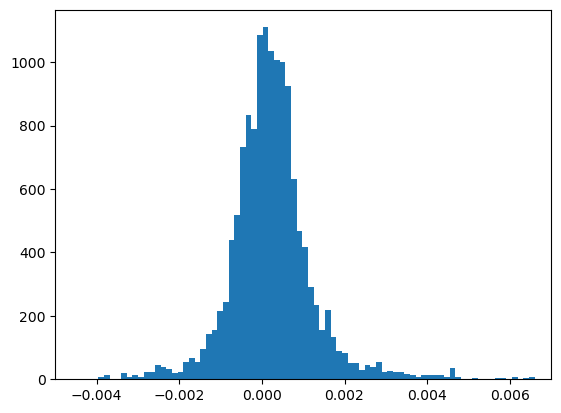

In [15]:

plt.hist(area_np_pre,bins=1000)
plt.xlim(-0.005,0.007)
plt.show()
